<a href="https://colab.research.google.com/github/candido05/Repositorio-do-livro-Hands-On-Machine-Learning-with-Scikit-Learn-Keras-and-Tensorflow-/blob/main/Capitulo9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 9 - Técnicas de Aprendizado não Supervisionado

### K-Means

In [1]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

In [2]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


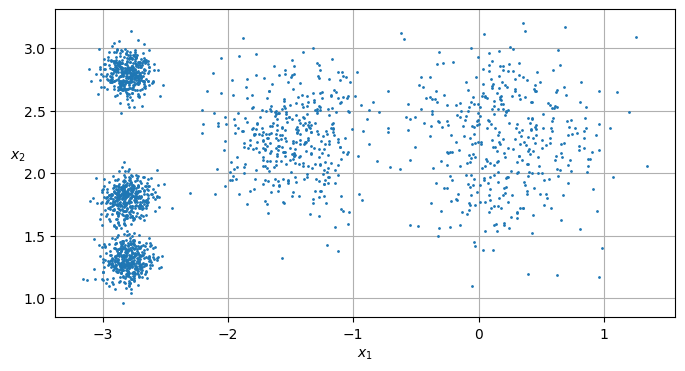

In [3]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [4]:
y_pred

array([3, 1, 2, ..., 4, 2, 1], dtype=int32)

In [5]:
y_pred is kmeans.labels_

True

In [6]:
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.80037642,  1.30082566],
       [-2.79290307,  2.79641063]])

In [7]:
import numpy as np

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 4, 4], dtype=int32)

In [8]:
# calculando a distância de cada instância em todo centroide

kmeans.transform(X_new)

array([[1.49439034, 2.81093633, 0.32995317, 2.88633901, 2.9042344 ],
       [4.4759332 , 5.80730058, 2.80290755, 5.84236351, 5.84739223],
       [1.69136631, 1.21475352, 3.29399768, 1.71086031, 0.29040966],
       [1.54808703, 0.72581411, 3.21806371, 1.21567622, 0.36159148]])

Métodos de inicialização do centroide

In [9]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

In [10]:
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [11]:
kmeans.inertia_

211.5985372581684

In [12]:
kmeans.score(X)

-211.59853725816836

K-Means acelerados e K-Means de mini-batch

In [13]:
from sklearn.cluster import MiniBatchKMeans

minibatch = MiniBatchKMeans(n_clusters=5)
minibatch.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

Encontrando o número ideal de clusters

In [14]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

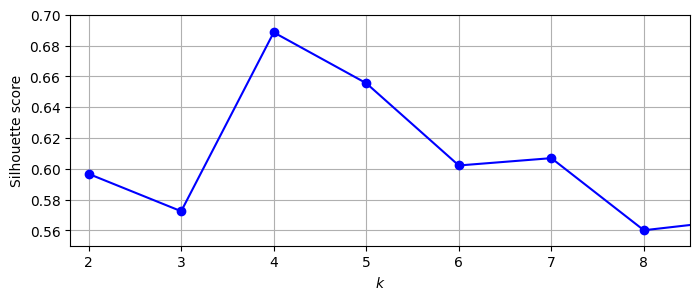

In [15]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

Usando a clusterização para segmentação de imagens

In [16]:
import urllib.request
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [17]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [18]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
segmented_imgs = []
n_colors = (20, 15, 10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))


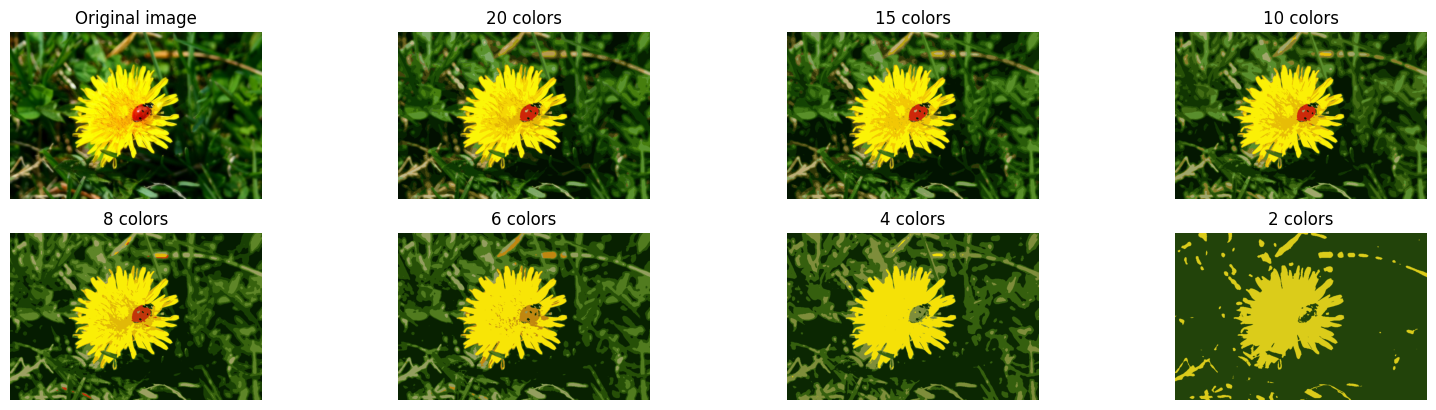

In [20]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.010, hspace=0.2)

plt.subplot(4, 4, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(4, 4, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

Usando a clusterização para o pré-processamento

In [21]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [22]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [23]:
log_reg.score(X_test, y_test)

0.9555555555555556

In [24]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, n_init=10)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init=10)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [25]:
pipeline.score(X_test, y_test)

0.9866666666666667

In [26]:
from posix import pipe
from sklearn.model_selection import GridSearchCV

param_grid = [{
    "kmeans__n_clusters": range(2, 100),
}]
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.1s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init=10)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid=[{'kmeans__n_clusters': range(2, 100)}], verbose=2)

In [27]:
print(grid_clf.best_params_)
print(grid_clf.score(X_test, y_test))

{'kmeans__n_clusters': 87}
0.9755555555555555


Usando a clusterização para aprendizado semissupervisionado

In [59]:
n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [29]:
log_reg.score(X_test, y_test)

0.8044444444444444

In [30]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


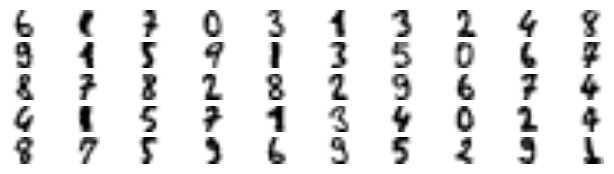

In [31]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [60]:
# rotulando manualmente

y_representative_digits = np.array([
    6, 8, 7, 0, 3, 1, 3, 2, 4, 8,
    9, 1, 5, 9, 1, 3, 5, 0, 6, 7,
    8, 7, 8, 2, 8, 2, 9, 6, 7, 4,
    4, 1, 5, 7, 1, 3, 4, 0, 2, 4,
    8, 7, 5, 9, 6, 9, 5, 2, 9, 1
])

In [61]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8955555555555555

In [62]:
# propagação de rótulo

y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

# treinando novamente o modelo para analisar o desemplenho
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9133333333333333

In [63]:
# propagando os rótulos em somente 20% das instâncias mais
# próximas dos centroides

percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [64]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9044444444444445

In [65]:
# acurácia:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.979381443298969

### DBSCAN

In [66]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [67]:
dbscan.labels_

array([ 0,  1,  2,  2,  2,  3,  2,  1,  5, -1, -1,  3,  4,  0, -1,  2,  1,
        2,  4,  2, -1,  5,  3,  0,  2,  3,  5,  3,  5,  6,  3,  5,  2, -1,
        3,  0,  2,  3,  3,  0,  2,  3, -1,  2,  2,  2,  3,  4, -1,  0,  2,
        1,  2,  5,  0,  0,  0,  0,  4,  0, -1,  3,  3,  5,  0,  1,  2,  3,
        2,  2,  1,  3,  3,  2,  1,  2,  3,  4,  3,  2,  4,  3, -1,  3,  3,
        2,  4,  3,  3,  2, -1,  3,  3,  4,  2,  2,  2,  5,  6,  2,  2,  2,
        4,  1,  0,  0,  2,  3,  5,  4,  2,  2,  5,  7, -1,  3,  4,  3,  2,
        5,  2,  2,  1,  4,  1,  0,  1,  5,  0, -1,  3,  2,  2,  6,  3,  0,
        1,  2,  5,  2,  4,  1,  0,  2,  2,  3,  2,  0,  0,  5,  0,  0,  3,
       -1,  3,  6,  0,  6,  5,  4,  5,  1,  3,  2,  2,  2,  3,  2,  2,  5,
        7,  3,  1,  5, -1,  2,  3,  4,  2,  4,  0, -1,  2,  3,  3,  0,  3,
        2, -1,  2,  2,  5,  6,  3,  0,  3,  6,  1,  3,  2,  2,  0,  3,  3,
        2,  3,  2,  5,  5,  5,  0,  5,  2,  3,  3,  3,  6,  3,  3,  2,  2,
        0,  5, -1,  5,  0

In [68]:
len(dbscan.core_sample_indices_)

770

In [69]:
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,  11,  12,  13,  15,  16,
        17,  18,  21,  22,  23,  24,  25,  28,  29,  30,  31,  32,  34,
        35,  36,  37,  39,  40,  41,  44,  45,  46,  47,  49,  50,  51,
        52,  55,  56,  57,  59,  61,  63,  64,  65,  66,  67,  68,  70,
        72,  73,  74,  75,  77,  78,  79,  80,  81,  83,  85,  86,  87,
        88,  89,  91,  92,  94,  95,  96,  97,  99, 100, 101, 102, 104,
       105, 106, 107, 108, 109, 110, 111, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135,
       136, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 154, 155, 156, 157, 161, 162, 163, 165, 166, 167, 169,
       171, 172, 173, 175, 176, 178, 179, 182, 183, 184, 185, 186, 187,
       190, 191, 192, 193, 195, 196, 197, 198, 200, 201, 202, 203, 204,
       205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 224, 225, 226, 227, 228, 229, 230, 232, 23

In [70]:
dbscan.components_

array([[-0.93469595,  0.33686668],
       [ 2.03330253,  0.25701605],
       [ 1.57581342, -0.37368989],
       ...,
       [ 0.72281189,  0.72025799],
       [ 2.00399096,  0.23237668],
       [-0.08146801,  1.00404993]])

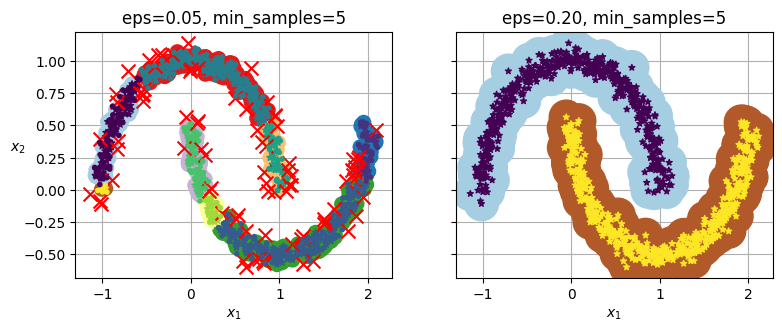

In [71]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))
plt.subplot(121)
plot_dbscan(dbscan, X, size=100)
plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan2.components_, dbscan2.labels_[dbscan2.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [73]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([0, 1, 0, 1])

In [74]:
knn.predict_proba(X_new)

array([[0.82, 0.18],
       [0.  , 1.  ],
       [0.88, 0.12],
       [0.  , 1.  ]])

In [75]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan2.labels_[dbscan2.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  0, -1])

### Mistura de gaussianas

In [76]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [77]:
gm.weights_

array([0.60349914, 0.19479677, 0.20170409])

In [78]:
gm.means_

array([[ 0.49270607,  0.25811446],
       [-0.76752015,  0.54426523],
       [ 1.75509989, -0.05357116]])

In [79]:
gm.covariances_

array([[[ 0.17730716, -0.11192544],
        [-0.11192544,  0.29545189]],

       [[ 0.04686112,  0.05738642],
        [ 0.05738642,  0.08560382]],

       [[ 0.04991073,  0.05978012],
        [ 0.05978012,  0.08769594]]])

In [80]:
gm.converged_

True

In [81]:
gm.n_iter_

18

In [82]:
gm.predict(X)

array([1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2,
       2, 1, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0,
       2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 2,
       0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 2, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1,
       2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0,

In [83]:
gm.predict_proba(X)

array([[3.98081710e-004, 9.99601918e-001, 4.08505752e-208],
       [1.42387182e-004, 1.81121351e-232, 9.99857613e-001],
       [2.92158307e-002, 4.02832372e-229, 9.70784169e-001],
       ...,
       [7.70438889e-004, 4.69810135e-244, 9.99229561e-001],
       [9.07483344e-001, 9.25166556e-002, 3.70594103e-174],
       [9.99503322e-001, 4.96677960e-004, 1.23215820e-157]])

In [84]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.06885402,  0.87921661],
       [ 0.38957508,  0.33399963],
       [ 0.41733807,  0.48794121],
       [-1.0566663 ,  0.04940077],
       [-0.63035692,  0.51498461],
       [ 1.60838215, -0.44352053]])

In [85]:
y_new

array([0, 0, 0, 1, 1, 2])

In [86]:
gm.score_samples(X)

array([-1.52389287e-01, -6.66557831e-01, -5.12787553e-01, -2.19062369e+00,
       -1.53358564e+00, -2.20921214e+00, -1.50709936e+00, -2.59577205e-01,
       -1.49828354e+00, -1.59650855e+00, -1.21208286e+00, -2.15209743e+00,
       -1.64115367e+00, -6.60095408e-02, -1.14759878e+00, -1.96847198e+00,
       -1.01728604e+00, -1.80903111e+00, -1.53151341e+00, -1.41783612e+00,
       -4.35552506e-01, -1.45767677e+00, -1.79806702e+00, -3.45462901e-01,
       -1.50681925e+00, -1.49164945e+00, -1.67375338e+00, -1.74743262e+00,
       -1.65074703e+00, -1.69952340e+00, -1.94371706e+00, -1.83435207e+00,
       -1.45143944e+00, -1.27938417e+00, -1.51911624e+00, -4.48991152e-01,
       -2.02511179e+00, -2.08704992e+00, -1.93749980e+00, -2.85133214e-01,
       -1.84137550e+00, -1.58275374e+00, -1.70488168e+00, -1.53810347e+00,
       -1.03721457e+00, -9.37406978e-01, -1.75631826e+00, -1.59307875e+00,
       -7.30664777e-01, -4.79794193e-01, -1.47768553e+00, -4.04897281e+00,
       -1.85321759e+00, -

Detecção de anomalias usando as misturas de guassianas

In [91]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
anomalies

array([[ 1.92746344,  0.50629189],
       [-0.19153221,  1.06521184],
       [-0.25114363,  0.90032375],
       [-0.94869705, -0.01762018],
       [ 1.98262649,  0.51461759],
       [-0.96686393,  0.03511073],
       [ 1.2123732 , -0.46130619],
       [-0.25506127,  0.93057059],
       [-0.24578233,  0.94347049],
       [ 1.20561261, -0.48931678],
       [ 1.77705689, -0.32022102],
       [ 0.68319735,  0.94775827],
       [-0.24706406,  0.92619376],
       [ 1.23996327, -0.37794498],
       [ 1.22424624, -0.44417025],
       [-0.89465594,  0.075803  ],
       [-0.30862544,  0.90077791],
       [-1.02686463, -0.08681721],
       [-1.01563725, -0.10749558],
       [ 1.8603739 , -0.20508434],
       [-0.84465016,  0.73991927],
       [ 1.91997705,  0.52577264],
       [-0.29160951,  0.88180059],
       [ 1.26846008, -0.35398511],
       [-0.22706322,  0.96228717],
       [-1.00811389,  0.00588704],
       [ 1.95158848,  0.52301366],
       [ 1.23861064, -0.45795657],
       [-0.23382975,

Selecionando o número de clusters

In [92]:
gm.bic(X)

2769.235201653081

In [93]:
gm.aic(X)

2685.8033619103844

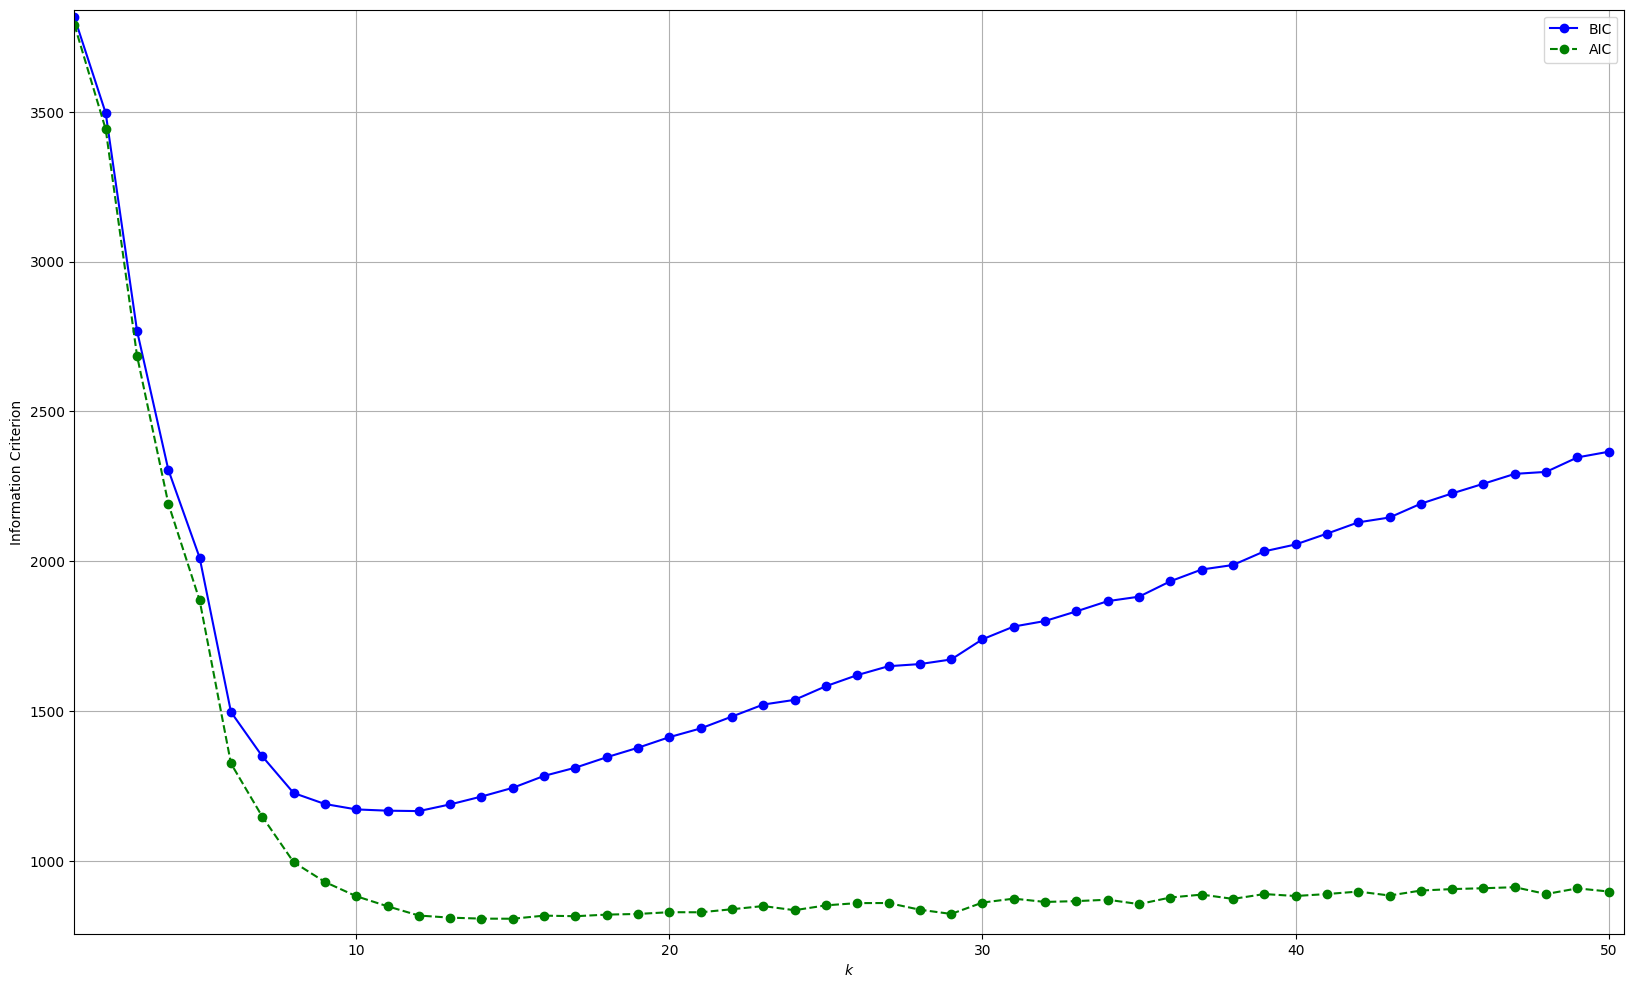

In [118]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 51)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(20, 12))
plt.plot(range(1, 51), bics, "bo-", label="BIC")
plt.plot(range(1, 51), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 50.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

Modelos de mistura de gaussianas bayesianos

In [117]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


array([0.12, 0.16, 0.11, 0.11, 0.12, 0.15, 0.13, 0.11, 0.  , 0.  ])

### Exercícios

* Q. 10

In [1]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [4]:
olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_val_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))

In [6]:
X_train_valid = olivetti.data[train_val_idx]
y_train_valid = olivetti.target[train_val_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=43)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = X_train_valid[train_idx]
y_train = y_train_valid[train_idx]
X_valid = X_train_valid[valid_idx]
y_valid = y_train_valid[valid_idx]

In [7]:
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [8]:
# reduzindo a dimensionalidade dos dados usando PCA

from sklearn.decomposition import PCA

pca = PCA(.99)
X_train_pca = pca.fit_transform(X_train)
X_valid_pca = pca.transform(X_valid)
X_test_pca = pca.transform(X_test)

pca.n_components_

199

In [12]:
# clustering as imagens usando K-Means

from sklearn.cluster import KMeans

k_range = range(5, 150, 5)
kmeans_per_k = []
for k in k_range:
  print(f'k = {k}')
  kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
  kmeans.fit(X_train_pca)
  kmeans_per_k.append(kmeans)

k = 5
k = 10
k = 15
k = 20
k = 25
k = 30
k = 35
k = 40
k = 45
k = 50
k = 55
k = 60
k = 65
k = 70
k = 75
k = 80
k = 85
k = 90
k = 95
k = 100
k = 105
k = 110
k = 115
k = 120
k = 125
k = 130
k = 135
k = 140
k = 145


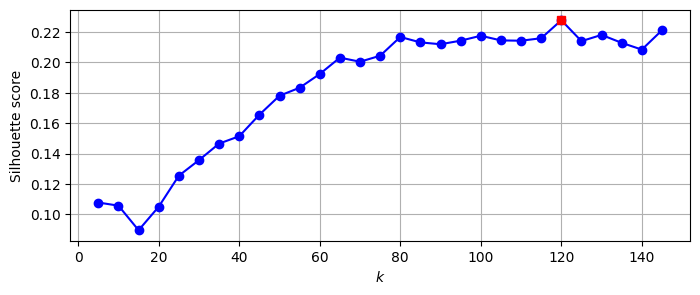

In [18]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

silhouette_score = [silhouette_score(X_train_pca, model.labels_)
                                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_score)
best_k = k_range[best_index]
best_score = silhouette_score[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_score, 'bo-')
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, 'rs')
plt.grid()
plt.show()

In [19]:
best_k

120

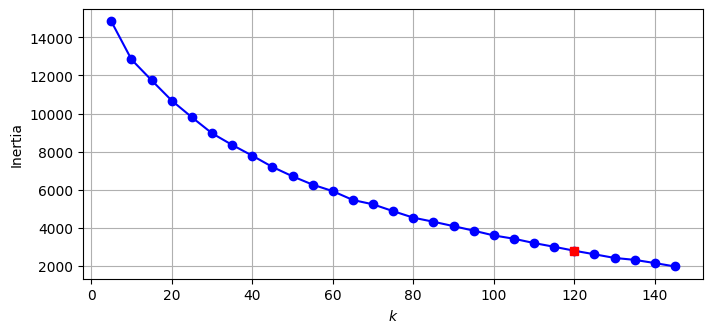

In [24]:
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

In [28]:
best_model = kmeans_per_k[best_index]
best_model

KMeans(n_clusters=120, n_init=10, random_state=42)

Cluster 0


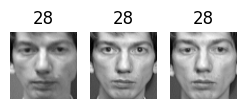

Cluster 1


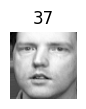

Cluster 2


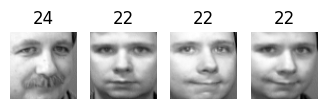

Cluster 3


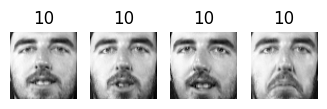

Cluster 4


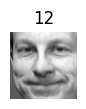

Cluster 5


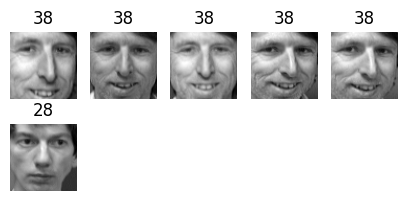

Cluster 6


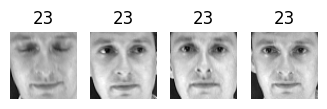

Cluster 7


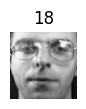

Cluster 8


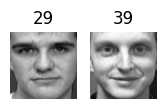

Cluster 9


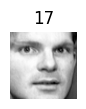

Cluster 10


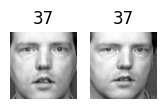

Cluster 11


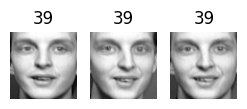

Cluster 12


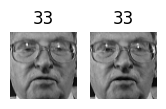

Cluster 13


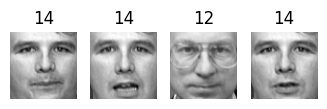

Cluster 14


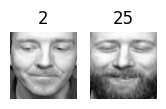

Cluster 15


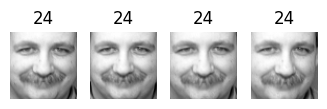

Cluster 16


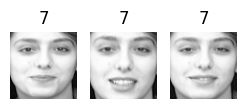

Cluster 17


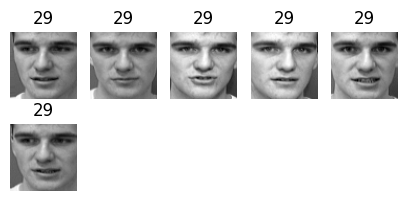

Cluster 18


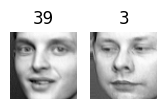

Cluster 19


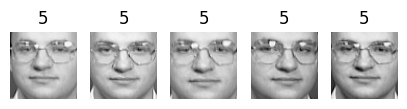

Cluster 20


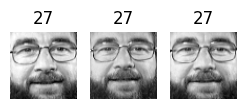

Cluster 21


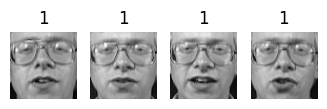

Cluster 22


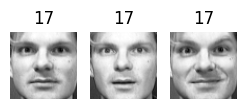

Cluster 23


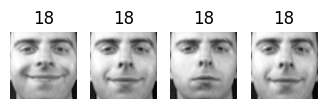

Cluster 24


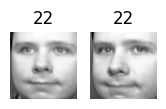

Cluster 25


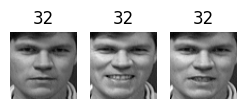

Cluster 26


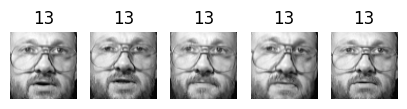

Cluster 27


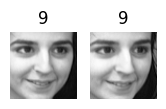

Cluster 28


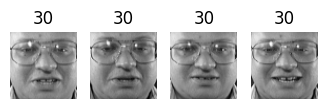

Cluster 29


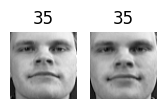

Cluster 30


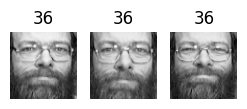

Cluster 31


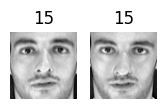

Cluster 32


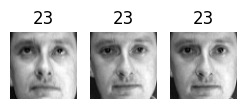

Cluster 33


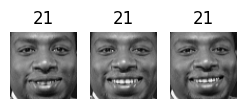

Cluster 34


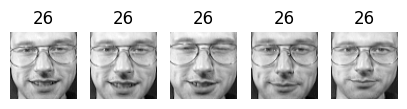

Cluster 35


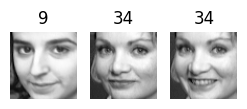

Cluster 36


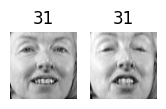

Cluster 37


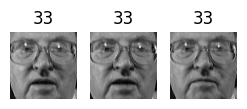

Cluster 38


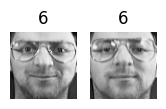

Cluster 39


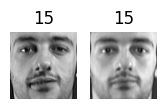

Cluster 40


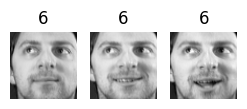

Cluster 41


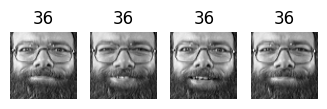

Cluster 42


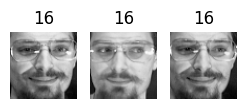

Cluster 43


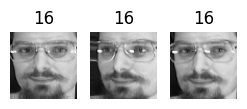

Cluster 44


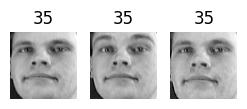

Cluster 45


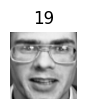

Cluster 46


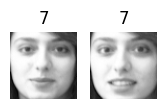

Cluster 47


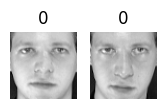

Cluster 48


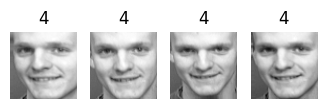

Cluster 49


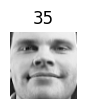

Cluster 50


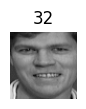

Cluster 51


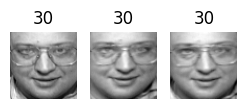

Cluster 52


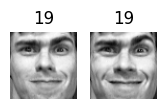

Cluster 53


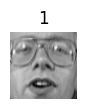

Cluster 54


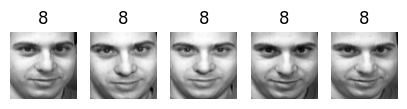

Cluster 55


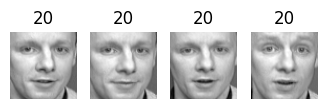

Cluster 56


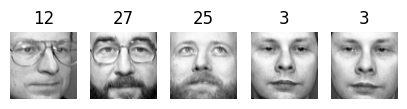

Cluster 57


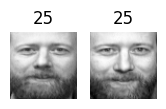

Cluster 58


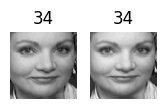

Cluster 59


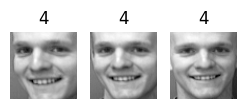

Cluster 60


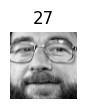

Cluster 61


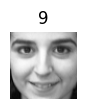

Cluster 62


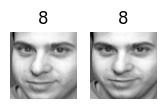

Cluster 63


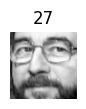

Cluster 64


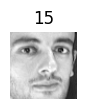

Cluster 65


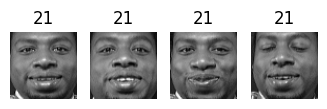

Cluster 66


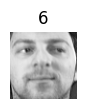

Cluster 67


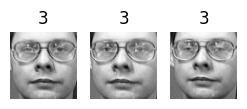

Cluster 68


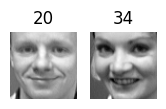

Cluster 69


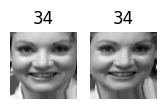

Cluster 70


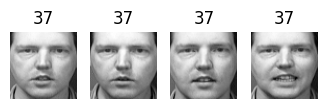

Cluster 71


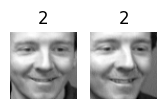

Cluster 72


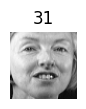

Cluster 73


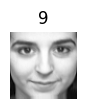

Cluster 74


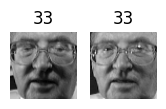

Cluster 75


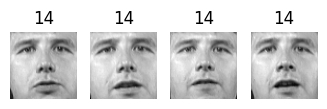

Cluster 76


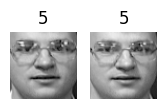

Cluster 77


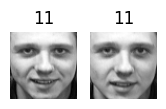

Cluster 78


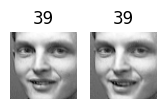

Cluster 79


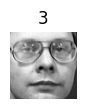

Cluster 80


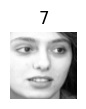

Cluster 81


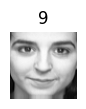

Cluster 82


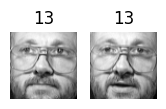

Cluster 83


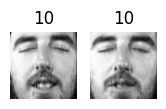

Cluster 84


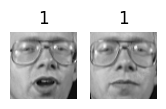

Cluster 85


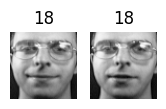

Cluster 86


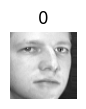

Cluster 87


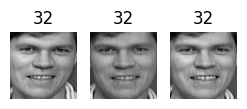

Cluster 88


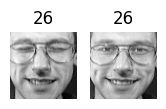

Cluster 89


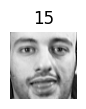

Cluster 90


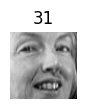

Cluster 91


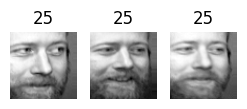

Cluster 92


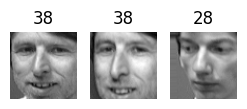

Cluster 93


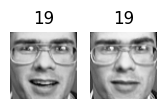

Cluster 94


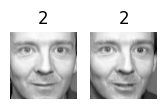

Cluster 95


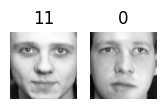

Cluster 96


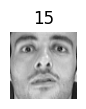

Cluster 97


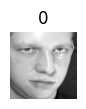

Cluster 98


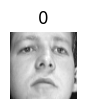

Cluster 99


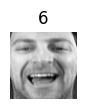

Cluster 100


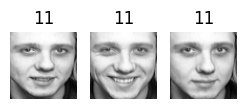

Cluster 101


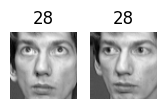

Cluster 102


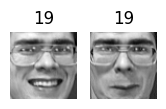

Cluster 103


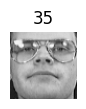

Cluster 104


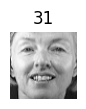

Cluster 105


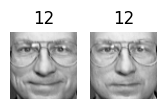

Cluster 106


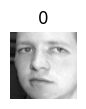

Cluster 107


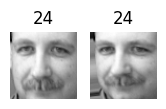

Cluster 108


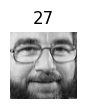

Cluster 109


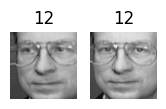

Cluster 110


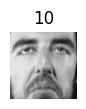

Cluster 111


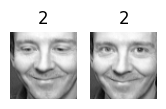

Cluster 112


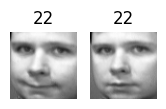

Cluster 113


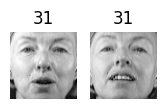

Cluster 114


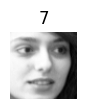

Cluster 115


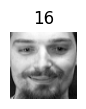

Cluster 116


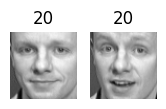

Cluster 117


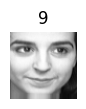

Cluster 118


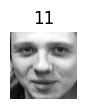

Cluster 119


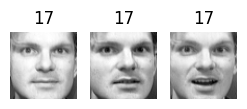

In [29]:
# visualizando os clusters

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

* Q. 11

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, n_estimators=150)
clf.fit(X_train_pca, y_train)
clf.score(X_valid_pca, y_valid)

0.925

In [33]:
X_train_reduce = best_model.transform(X_train_pca)
X_valid_reduce = best_model.transform(X_valid_pca)
X_test_reduce = best_model.transform(X_test_pca)

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_reduce, y_train)
clf.score(X_valid_reduce, y_valid)

0.7

In [36]:
from sklearn.pipeline import make_pipeline

for n_clusters in k_range:
  pipeline = make_pipeline(
      KMeans(n_clusters=n_clusters, n_init=10, random_state=42),
      RandomForestClassifier(n_estimators=150, random_state=42)
  )

  pipeline.fit(X_train_pca, y_train)
  print(f'{n_clusters} - {pipeline.score(X_valid_pca, y_valid)}')

5 - 0.3875
10 - 0.575
15 - 0.6
20 - 0.6625
25 - 0.6625
30 - 0.6625
35 - 0.675
40 - 0.75
45 - 0.7375
50 - 0.725
55 - 0.7125
60 - 0.7125
65 - 0.7375
70 - 0.7375
75 - 0.7375
80 - 0.7875
85 - 0.75
90 - 0.75
95 - 0.7125
100 - 0.775
105 - 0.75
110 - 0.725
115 - 0.7375
120 - 0.7
125 - 0.75
130 - 0.725
135 - 0.7375
140 - 0.7625
145 - 0.6875


In [37]:
X_train_extended = np.c_[X_train_pca, X_train_reduce]
X_valid_extended = np.c_[X_valid_pca, X_valid_reduce]
X_test_extended = np.c_[X_test_pca, X_test_reduce]

clf = RandomForestClassifier(n_estimators=150, random_state=42)
clf.fit(X_train_extended, y_train)
clf.score(X_valid_extended, y_valid)

0.8125

* Q. 12

In [39]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=90, random_state=42)
y_pred = gm.fit_predict(X_train_pca)

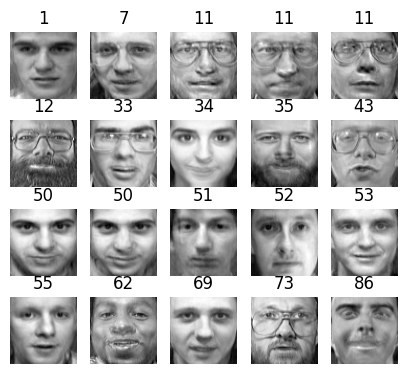

In [40]:
gen_faces_reduce, y_gen_faces = gm.sample(n_samples=20)
gen_face = pca.inverse_transform(gen_faces_reduce)
plot_faces(gen_face, y_gen_faces)

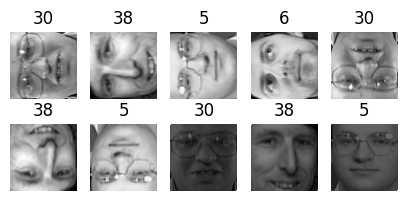

In [41]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad)

In [42]:
X_badfaces_pca = pca.transform(X_bad_faces)
gm.score_samples(X_badfaces_pca)

array([-2.64515233e+07, -2.26427522e+07, -4.15206462e+07, -5.37296229e+07,
       -3.36198895e+07, -1.39330491e+07, -2.92374187e+07, -1.14671115e+08,
       -1.28168426e+08, -7.80179026e+07])

In [43]:
gm.score_samples(X_train_pca[:10])

array([1178.42352198, 1149.16682413, 1156.32132836, 1170.6760275 ,
       1147.22264978, 1170.2574719 , 1171.28366216, 1133.52173548,
       1126.39306707, 1157.23884145])

* Q. 13

In [44]:
X_train_pca.round(2)

array([[  3.78,  -1.85,  -5.14, ...,  -0.14,  -0.21,   0.06],
       [ 10.15,  -1.53,  -0.77, ...,   0.12,  -0.14,  -0.02],
       [-10.02,   2.88,  -0.92, ...,   0.07,  -0.  ,   0.12],
       ...,
       [  2.48,   2.96,   1.3 , ...,  -0.02,   0.03,  -0.15],
       [ -3.22,   5.35,   1.39, ...,   0.06,  -0.23,   0.16],
       [ -0.92,  -3.65,   2.26, ...,   0.14,  -0.07,   0.06]],
      dtype=float32)

In [46]:
def reconstruction_errors(pca, X):
    X_pca = pca.transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = np.square(X_reconstructed - X).mean(axis=-1)
    return mse

reconstruction_errors(pca, X_train).mean()

0.0001920535

In [47]:
reconstruction_errors(pca, X_bad_faces).mean()

0.0047073546

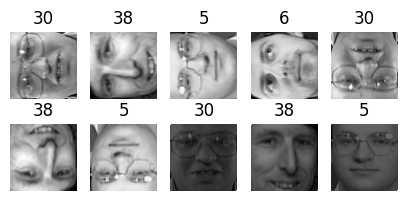

In [48]:
plot_faces(X_bad_faces, y_bad)

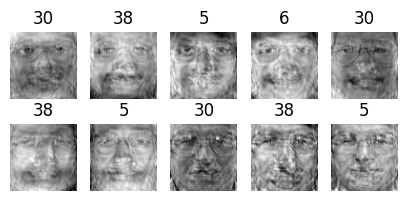

In [50]:
X_badfaces_reconstructed = pca.inverse_transform(X_badfaces_pca)
plot_faces(X_badfaces_reconstructed, y_bad)